In [0]:
import tensorflow as tf

In [2]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 43.1MB/s 
     |████████████████████████████████| 3.9MB 37.0MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers, optimizers, utils
import numpy as np
import matplotlib.pyplot as plt


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-3e24329faa48>", line 2, in <module>
    from tensorflow.keras.datasets import reuters
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 50, in __getattr__
    module = self._load()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/__init__.py", line 44, in _load
    module = _importlib.import_module(self.__name__)
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/api/_v1/keras/__init__.py", line 16, in <module>
    from . import backend
  File "/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/keras/api/_v1/keras/backend/__init__.py", line 11, in <module>
    

ImportError: ignored

In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [0]:
print(len(train_data))
print(len(test_data))

8982
2246


In [0]:
def vectorized_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results
  
x_train= vectorized_sequences(train_data)
x_test= vectorized_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results=np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1.
  return results
  
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [0]:
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 248us/sample - loss: 2.5965 - accuracy: 0.4985 - val_loss: 1.7249 - val_accuracy: 0.6300
Epoch 2/20
7982/7982 [==============================] - 1s 152us/sample - loss: 1.4020 - accuracy: 0.7073 - val_loss: 1.2813 - val_accuracy: 0.7230
Epoch 3/20
7982/7982 [==============================] - 1s 150us/sample - loss: 1.0300 - accuracy: 0.7845 - val_loss: 1.1079 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 155us/sample - loss: 0.8093 - accuracy: 0.8305 - val_loss: 1.0083 - val_accuracy: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 151us/sample - loss: 0.6366 - accuracy: 0.8691 - val_loss: 0.9415 - val_accuracy: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 150us/sample - loss: 0.5079 - accuracy: 0.8976 - val_loss: 0.9084 - val_accuracy: 0.8200
Epoch 7/20
7982/7982 [==============================] - 1s 155us

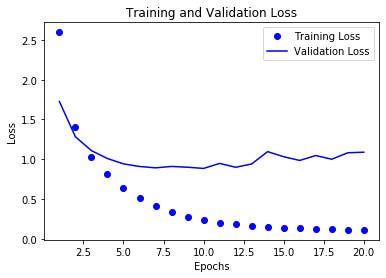

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training Acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation Acc')
plt.title('Training and Validation Acc')
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()


In [0]:
 model.predict(x_test)

array([[2.8457573e-05, 1.9931424e-04, 6.2260222e-07, ..., 4.0976127e-07,
        5.7034238e-10, 7.6150963e-07],
       [1.2333100e-04, 5.9399676e-01, 6.4265350e-04, ..., 3.7468584e-05,
        9.0475478e-06, 3.6300128e-04],
       [4.9361767e-04, 9.8420185e-01, 3.9394527e-05, ..., 5.5454957e-06,
        2.2704635e-05, 1.8211440e-05],
       ...,
       [7.8742789e-07, 3.3712695e-05, 1.4345810e-06, ..., 2.8306786e-08,
        2.9814311e-09, 6.4713208e-07],
       [1.0946844e-03, 5.2129164e-02, 5.2141881e-04, ..., 1.4868402e-04,
        2.2488716e-06, 7.1196537e-04],
       [6.2179308e-05, 9.7030085e-01, 3.5696782e-04, ..., 3.3966737e-06,
        1.8799888e-06, 8.2745864e-06]], dtype=float32)